# Project Overview

The aim of this project is to analyze a dataset from Bitcoin Alpha, a platform where users review each other based on trust. The dataset contains user IDs, trust ratings, and timestamps of the ratings. By constructing a graph from this data, the study investigates the social network features and dynamics using Social Network Analysis (SNA) methodologies.

Specifically, the diffusion of innovation within the network is explored using the Independent Cascade Model. By simulating the spread of information from a small set of initial adopters, the project aims to uncover patterns and insights about user interactions and trust connections. This analysis helps in understanding how new ideas propagate and influence the community within this trust-based network.

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms import community
import networkx.algorithms.community as nx_comm
import itertools

In [ ]:
# Load the compressed CSV file
file_path = 'soc-sign-bitcoinalpha.csv.gz'
df = pd.read_csv(file_path, compression='gzip', header=None, names=['SOURCE', 'TARGET', 'RATING', 'TIME'])

In [ ]:
df.head()

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400


# Network Overview

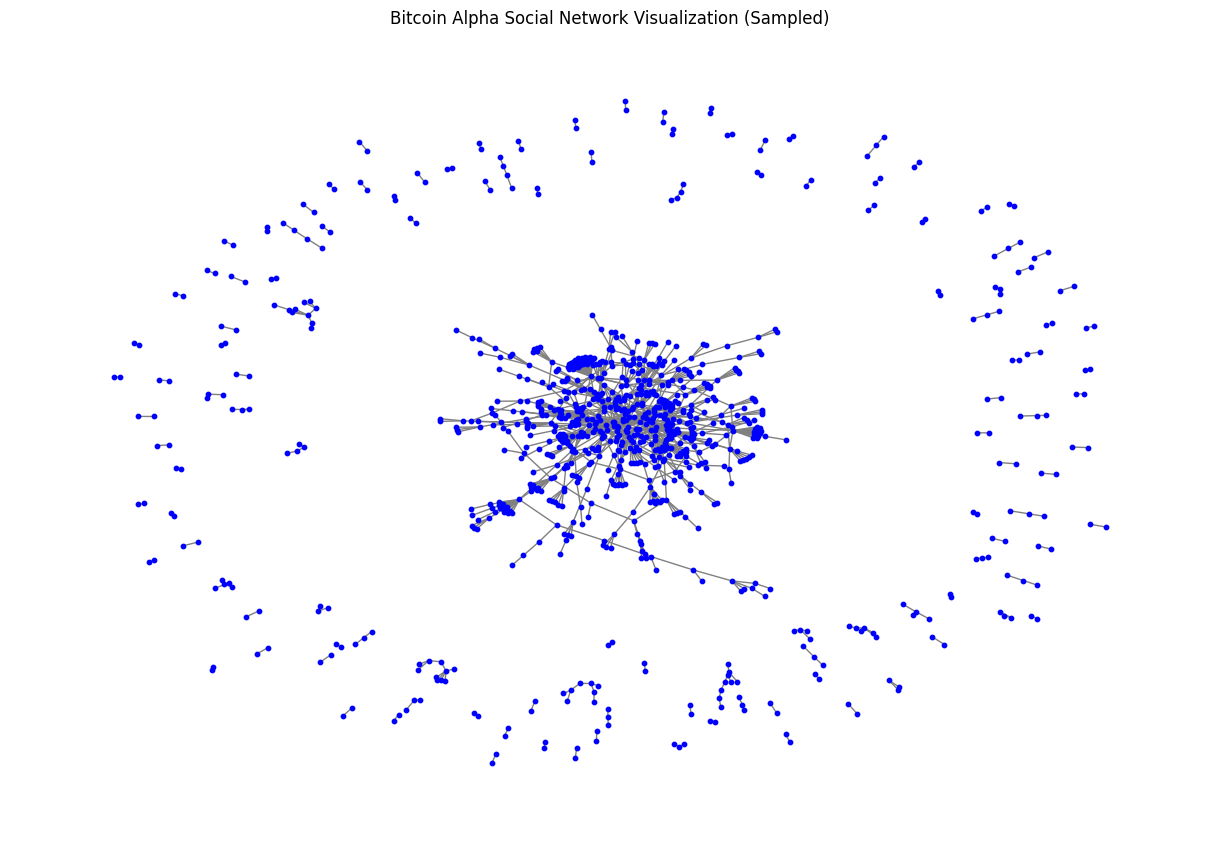

In [ ]:
# Sample a subset of the edges
df_sample = df.sample(n=1000, random_state=1)  # Adjust n to change the size of the sample

# Create a graph from the sampled edges
G_sample = nx.from_pandas_edgelist(df_sample, source='SOURCE', target='TARGET')

# Visualization of the Network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sample, seed=42)  # Using a seed for reproducibility
nx.draw(G_sample, pos, node_size=10, node_color='blue', edge_color='gray')
plt.title('Bitcoin Alpha Social Network Visualization (Sampled)')
plt.show()

## Network Characteristics

In [ ]:
# Calculate network characteristics
size = G_sample.number_of_nodes()
num_links = G_sample.number_of_edges()

# Calculating average path length for the largest connected component
largest_cc = max(nx.connected_components(G_sample), key=len)
G_largest_cc = G_sample.subgraph(largest_cc)

avg_path_length = nx.average_shortest_path_length(G_largest_cc)
clustering_coefficient = nx.average_clustering(G_sample)

print(f"Size (Number of Nodes): {size}")
print(f"Number of Links (Edges): {num_links}")
print(f"Average Path Length: {avg_path_length}")
print(f"Clustering Coefficient: {clustering_coefficient}")

Size (Number of Nodes): 977
Number of Links (Edges): 985
Average Path Length: 6.133620669954431
Clustering Coefficient: 0.003993739056767662


## Distance Metrics

In [ ]:
diameter = nx.diameter(G_largest_cc)
eccentricity = nx.eccentricity(G_largest_cc)
radius = nx.radius(G_largest_cc)
center = list(nx.center(G_largest_cc))
periphery = list(nx.periphery(G_largest_cc))
total_length = sum(sum(lengths.values()) for node, lengths in nx.shortest_path_length(G_largest_cc))
avg_distance = total_length / (size * (size - 1))

print(f"Diameter: {diameter}")
print(f"Eccentricity: {eccentricity}")
print(f"Radius: {radius}")
print(f"Center: {center}")
print(f"Periphery: {periphery}")
print(f"Average Distance: {avg_distance}")

Diameter: 17
Eccentricity: {1: 11, 22: 12, 189: 13, 52: 12, 67: 13, 102: 13, 1867: 12, 264: 11, 21: 10, 104: 12, 375: 13, 30: 10, 266: 11, 27: 13, 88: 12, 40: 13, 237: 14, 382: 13, 368: 14, 641: 12, 306: 13, 92: 12, 345: 11, 9: 11, 2770: 12, 430: 13, 831: 14, 1523: 13, 2: 12, 5: 11, 7522: 12, 15: 12, 159: 13, 202: 11, 2004: 12, 48: 14, 137: 13, 291: 12, 69: 10, 2169: 11, 85: 13, 320: 13, 3193: 12, 87: 13, 1156: 13, 38: 11, 2906: 12, 2767: 12, 19: 13, 219: 13, 177: 13, 423: 11, 4: 10, 3254: 14, 2280: 12, 25: 12, 17: 12, 1304: 13, 81: 10, 36: 11, 196: 14, 1277: 15, 164: 10, 761: 11, 1859: 11, 315: 11, 1337: 12, 260: 14, 78: 13, 3: 11, 175: 15, 3516: 16, 121: 12, 800: 11, 24: 13, 124: 12, 60: 10, 518: 11, 70: 12, 82: 14, 881: 14, 13: 13, 14: 13, 548: 14, 7: 12, 1152: 11, 289: 12, 192: 14, 2068: 15, 863: 14, 76: 13, 97: 12, 6: 12, 642: 13, 43: 12, 244: 11, 507: 16, 72: 15, 33: 9, 45: 10, 174: 12, 7595: 13, 113: 13, 617: 12, 10: 11, 142: 12, 235: 15, 144: 14, 47: 13, 280: 12, 3386: 17, 158:

# Centrality Measure

In [ ]:
pagerank = nx.pagerank(G_largest_cc)
betweenness_centrality = nx.betweenness_centrality(G_largest_cc)
closeness_centrality = nx.closeness_centrality(G_largest_cc)

print(f"PageRank: {dict(list(pagerank.items())[:5])}")
print(f"Betweenness Centrality: {dict(list(betweenness_centrality.items())[:5])}")
print(f"Closeness Centrality: {dict(list(closeness_centrality.items())[:5])}")

PageRank: {1: 0.02344205320744418, 22: 0.006691713727943164, 189: 0.0006560375840817147, 52: 0.0030324402204107903, 67: 0.004553107918272405}
Betweenness Centrality: {1: 0.13974000834508335, 22: 0.06357205626201322, 189: 0.0, 52: 0.029046478577836037, 67: 0.04600719077476058}
Closeness Centrality: {1: 0.2200399467376831, 22: 0.20714509558132246, 189: 0.1805517618137121, 52: 0.2202599133622126, 67: 0.21858465608465608}


In [ ]:
size, num_links, avg_path_length, clustering_coefficient, diameter, radius, center, periphery, avg_distance, \
dict(list(pagerank.items())[:5]), dict(list(betweenness_centrality.items())[:5]), dict(list(closeness_centrality.items())[:5])

(977,
 985,
 6.133620669954431,
 0.003993739056767662,
 17,
 9,
 [33, 16, 326, 130],
 [3386, 2104, 2991],
 2.8146991459301645,
 {1: 0.02344205320744418,
  22: 0.006691713727943164,
  189: 0.0006560375840817147,
  52: 0.0030324402204107903,
  67: 0.004553107918272405},
 {1: 0.13974000834508335,
  22: 0.06357205626201322,
  189: 0.0,
  52: 0.029046478577836037,
  67: 0.04600719077476058},
 {1: 0.2200399467376831,
  22: 0.20714509558132246,
  189: 0.1805517618137121,
  52: 0.2202599133622126,
  67: 0.21858465608465608})

In [ ]:
# Function to plot centrality
def plot_centrality(G, pos, centrality, title):
    plt.figure(figsize=(12, 8))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma,
                                   node_color=list(centrality.values()),
                                   nodelist=centrality.keys())
    edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.colorbar(nodes)
    plt.title(title)
    plt.show()

Plotting centrality measures

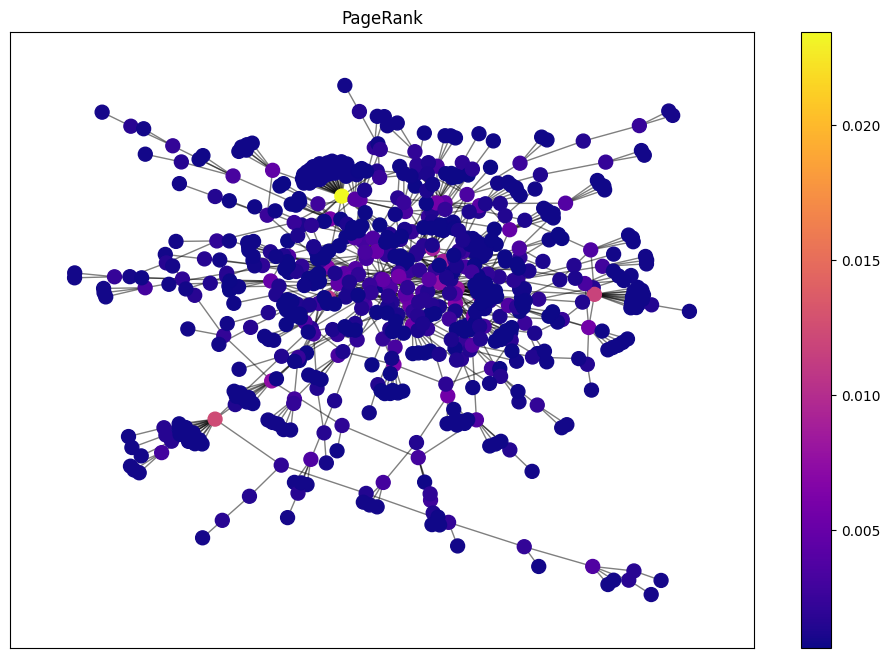

In [ ]:
plot_centrality(G_largest_cc, pos, pagerank, 'PageRank')

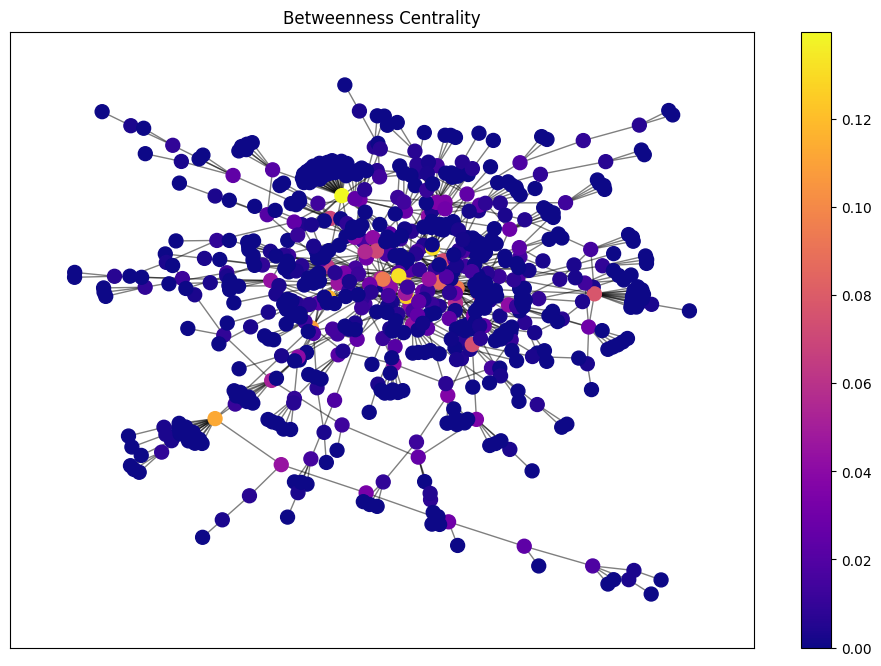

In [ ]:
plot_centrality(G_largest_cc, pos, betweenness_centrality, 'Betweenness Centrality')

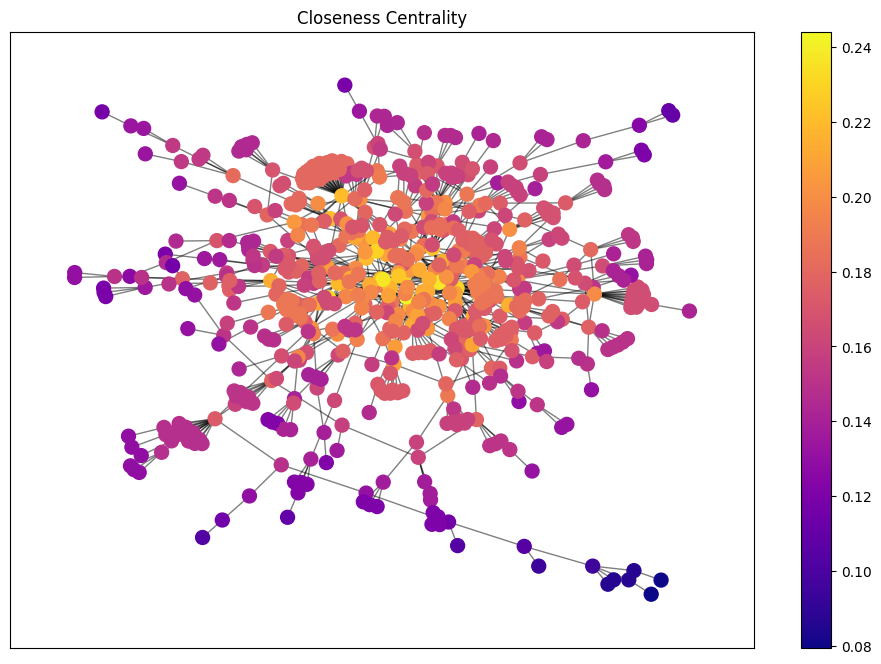

In [ ]:
plot_centrality(G_largest_cc, pos, closeness_centrality, 'Closeness Centrality')

# Degree Distribution

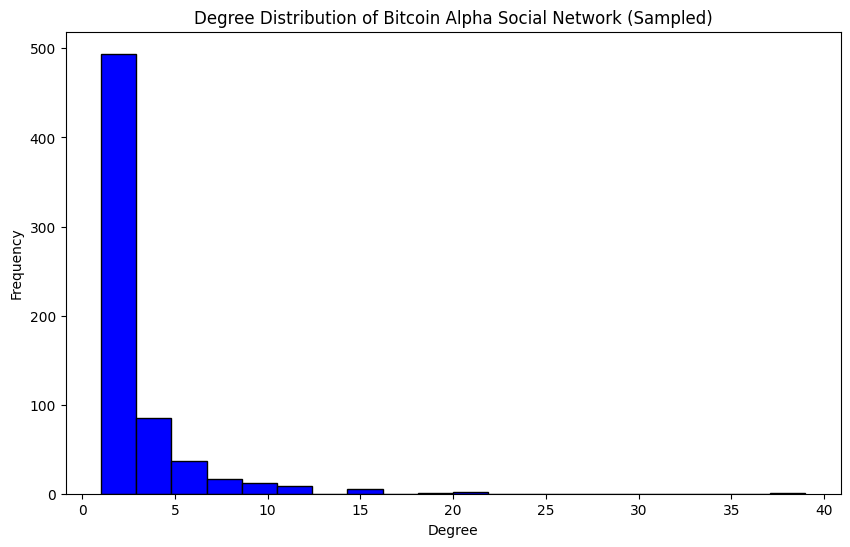

In [ ]:
degrees = [deg for node, deg in G_largest_cc.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=20, color='blue', edgecolor='black')
plt.title('Degree Distribution of Bitcoin Alpha Social Network (Sampled)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Community Detection

In [ ]:
communities = nx_comm.greedy_modularity_communities(G_largest_cc)
modularity_dict = {node: cid for cid, community in enumerate(communities) for node in community}

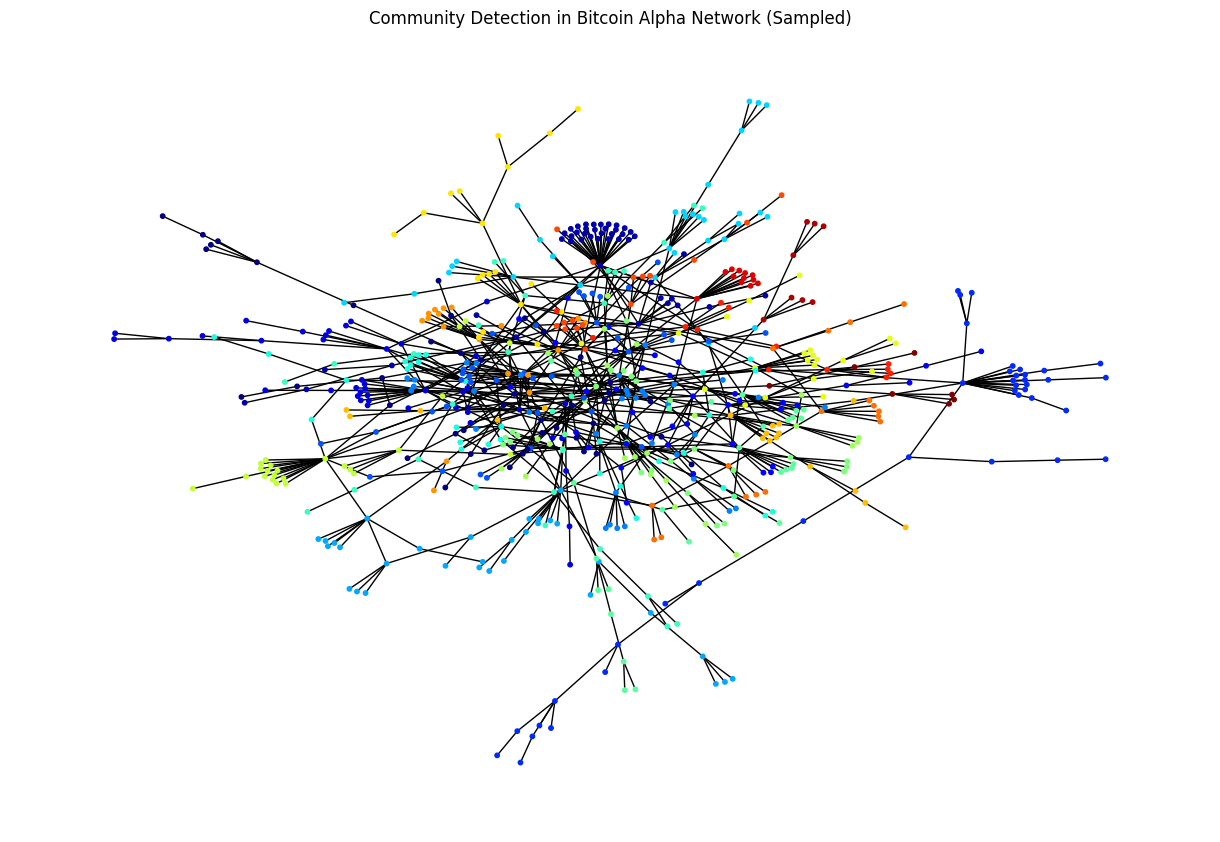

In [ ]:
# Visualization of communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_largest_cc, seed=42)  # Using the same layout for consistency
colors = [modularity_dict[node] for node in G_largest_cc.nodes()]
nx.draw(G_largest_cc, pos, node_color=colors, node_size=10, cmap=plt.cm.jet)
plt.title('Community Detection in Bitcoin Alpha Network (Sampled)')
plt.show()

# Maximum Spread of Information Cascades in Bitcoin Alpha Network

In [ ]:
# Display basic information about the network
num_nodes = G_sample.number_of_nodes()
num_edges = G_sample.number_of_edges()
network_info = f"Number of nodes: {num_nodes}\nNumber of edges: {num_edges}"
print(network_info)

Number of nodes: 977
Number of edges: 985


## Diffusion Simulation

In [ ]:
import random

In [ ]:
def independent_cascade(G, seed_set, steps=5):
    active = set(seed_set)
    new_active = set(seed_set)
    for _ in range(steps):
        new_activated = set()
        for node in new_active:
            neighbors = set(G.neighbors(node)) - active
            for neighbor in neighbors:
                if random.random() < 0.1:  # 10% chance of influence
                    new_activated.add(neighbor)
        if not new_activated:
            break
        active.update(new_activated)
        new_active = new_activated
    return active

# Choose a random set of initial adopters (seed nodes)
seed_nodes = random.sample(list(G_sample.nodes()), 5)

# Simulate the diffusion process
final_active = independent_cascade(G_sample, seed_nodes)
print(f"Initial seed nodes: {seed_nodes}")
print(f"Total number of nodes activated after diffusion: {len(final_active)}")

Initial seed nodes: [311, 1116, 6369, 586, 279]
Total number of nodes activated after diffusion: 10


## Analysis

In [ ]:
# Analyzing the diffusion results
# Identify key nodes and patterns
degree_distribution = [G_sample.degree(n) for n in final_active]
average_degree = sum(degree_distribution) / len(degree_distribution)

print(f"Average degree of activated nodes: {average_degree}")

Average degree of activated nodes: 2.5


## Visualization

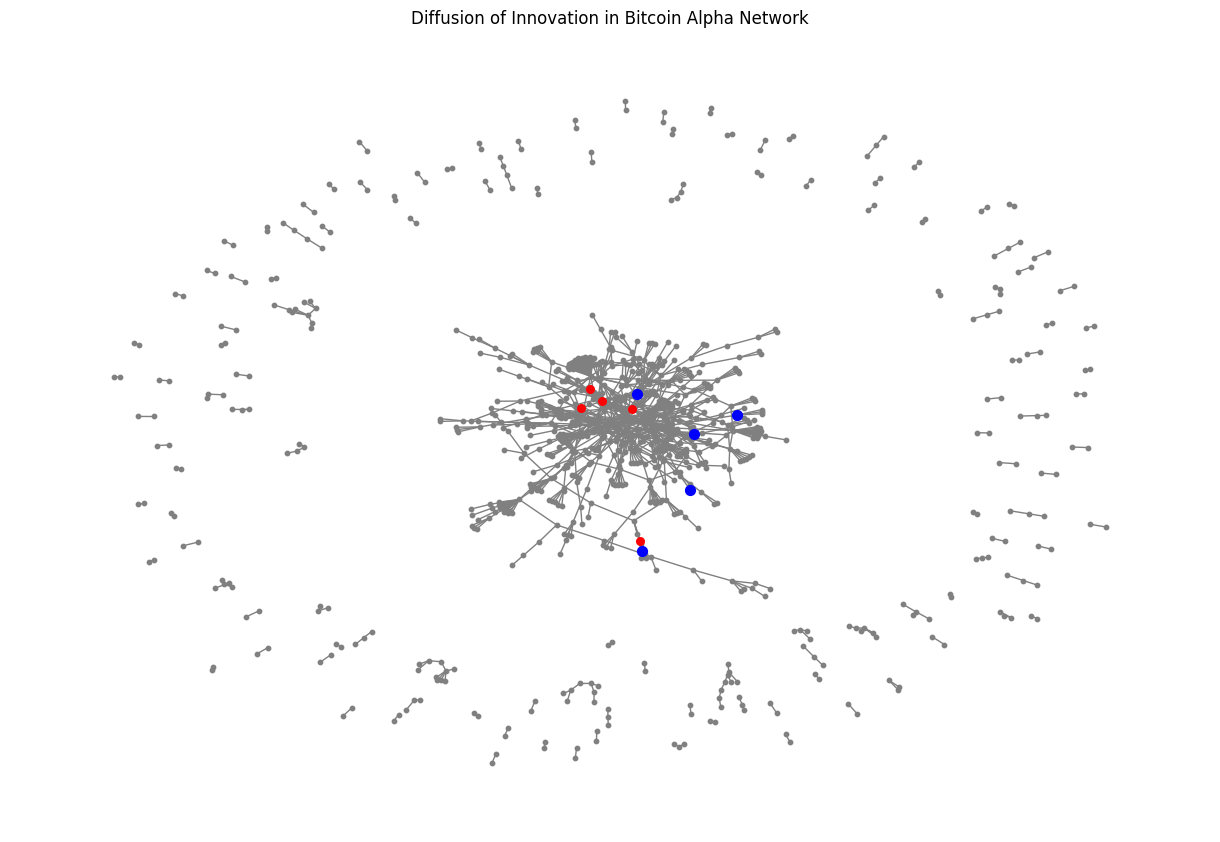

In [ ]:
# Visualize the diffusion process
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sample, seed=42)
nx.draw(G_sample, pos, node_size=10, node_color='gray', edge_color='gray')
nx.draw_networkx_nodes(G_sample, pos, nodelist=final_active, node_size=30, node_color='red')
nx.draw_networkx_nodes(G_sample, pos, nodelist=seed_nodes, node_size=50, node_color='blue')
plt.title('Diffusion of Innovation in Bitcoin Alpha Network')
plt.show()